In [66]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
from importlib import reload
from math import sqrt, ceil
from itertools import combinations

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
lowess = sm.nonparametric.lowess
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 500)

In [2]:
d_paths = {'data': Path().cwd().parent / 'data',
           'helpers': Path().cwd()/ 'helpers', 
           'charts': Path().cwd()/ 'charts'}

sys.path.append(str(d_paths['helpers']))
import graph
import data_helper
import functions
import Linear_Regression
from Linear_Regression import Linear_Regr

In [3]:
df_data_main = data_helper.load_data('Boston', d_paths['data'], index_col=0)

Remove outliers

In [5]:
df_data = df_data_main.copy()

In [63]:
outliers = ['B14', 'A14', 'Q14']
df_data = df_data_main[~df_data_main.index.isin(outliers)].copy()

In [49]:
reload(Linear_Regression)
from Linear_Regression import Linear_Regr

<module 'Linear_Regression' from '/Users/artemgershkovich/python/ISLR_ESL/python/helpers/Linear_Regression.py'>

In [104]:
l_form = [
'ptratio',
'rm',
'lstat',
'crim',
'I(dis ** 2)',
'ptratio:rm',
'ptratio:chas',
'ptratio:lstat',
'rm:chas',
'rm:lstat',
'rm:I(lstat ** 2)',
'rm:I(dis ** 2)',
'chas:lstat',
'chas:I(lstat ** 2)',
'lstat:crim',
'lstat:I(lstat ** 2)',
'lstat:I(dis ** 2)',
'crim:I(lstat ** 2)']

In [105]:
y_var = 'medv'
# d_x_vars = {'lstat': 1, 'age':1, 'crim':1, 'rm':1}
# d_x_vars = {x:1 for x in list(set(df_data.columns)-{y_var})}
# formula = functions.make_formula('medv', d_x_vars)
formula = 'medv ~ '+' + '.join(l_form)
# formula = 'medv ~ lstat + I(lstat ** 2) + age + crim'
# formula = 'medv ~ (lstat + I(lstat ** 2) + age + crim)**2+ standardize(crim)'
# formula = 'medv ~ lstat + I(lstat ** 2) + age + standardize(crim)'
# formula = 'medv ~ (ptratio + rm + chas + lstat + crim + I(lstat**2) + I(dis**2))**2'
formula

'medv ~ ptratio + rm + lstat + crim + I(dis ** 2) + ptratio:rm + ptratio:chas + ptratio:lstat + rm:chas + rm:lstat + rm:I(lstat ** 2) + rm:I(dis ** 2) + chas:lstat + chas:I(lstat ** 2) + lstat:crim + lstat:I(lstat ** 2) + lstat:I(dis ** 2) + crim:I(lstat ** 2)'

In [106]:
lm = smf.ols (formula, df_data).fit()
obj_Linear_Regr = Linear_Regr(results=lm, df_data=df_data)
self = obj_Linear_Regr

obj_Linear_Regr.formula()
obj_Linear_Regr.summary()

f"RSE : {round(obj_Linear_Regr.rse(),4)}"
# f"R-sq : {round(obj_Linear_Regr.r_sq()*100,1)}"
# obj_Linear_Regr.params()
# obj_Linear_Regr.conf_int_params()

'medv ~ ptratio + rm + lstat + crim + I(dis ** 2) + ptratio:rm + ptratio:chas + ptratio:lstat + rm:chas + rm:lstat + rm:I(lstat ** 2) + rm:I(dis ** 2) + chas:lstat + chas:I(lstat ** 2) + lstat:crim + lstat:I(lstat ** 2) + lstat:I(dis ** 2) + crim:I(lstat ** 2)'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          1.48e-185
Time:                        22:11:07   Log-Likelihood:                -1354.1
No. Observations:                 503   AIC:                             2746.
Df Residuals:                     484   BIC:                             2826.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -141.7521     18.214     -7.782      0.000    -177.541    -105.963
ptratio                 7.1750      1.048      6.846      0.000       5.116       9.234
rm                     27.3336      2.428     11.256      0.000      22.562      32.105
lstat                   2.5790      0.468      5.507      0.000       1.659       3.499
crim                    0.5225      0.181      2.884      0.004       0.166       0.878
I(dis ** 2)            -0.4227      0.121     -3.501      0.001      -0.660      -0.185
ptratio:rm             -1.0895      0.143     -7.617      0.000      -1.371      -0.808
ptratio:chas            1.7219      0.294      5.861      0.000       1.145       2.299
ptratio:lstat          -0.0665      0.017     -3.998      0.000      -0.099      -0.034
rm:chas                -2.8017      0.609     -4.599      0.000      -3.999      -1.605
rm:lstat               -0.4843      0.073     -6.598      0.000      -0.628      -0.340
rm:I(lstat ** 2)        0.0076      0.002      3.966      0.000       0.004       0.011
rm:I(dis ** 2)          0.0495      0.017      2.906      0.004       0.016       0.083
chas:lstat             -1.3356      0.400     -3.336      0.001      -2.122      -0.549
chas:I(lstat ** 2)      0.0342      0.014      2.369      0.018       0.006       0.063
lstat:crim             -0.0567      0.017     -3.298      0.001      -0.090      -0.023
lstat:I(lstat ** 2)    -0.0006      0.000     -2.430      0.015      -0.001      -0.000
lstat:I(dis ** 2)       0.0076      0.002      3.296      0.001       0.003       0.012
crim:I(lstat ** 2)      0.0011      0.000      2.874      0.004       0.000       0.002
==============================================================================
Omnibus:                      221.381   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2209.513
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                      12.727   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'RSE : 3.6414'

In [107]:
obj_Linear_Regr.vif()

,Features,VIF Factor
0,Intercept,12585.586399
1,ptratio,195.335033
2,rm,104.591528
3,lstat,424.122341
4,crim,74.414273
5,I(dis ** 2),247.157635
6,ptratio:rm,168.686989
7,ptratio:chas,63.470270
8,ptratio:lstat,223.214875
9,rm:chas,37.530792


In [108]:
res1 = obj_Linear_Regr.fig_residual(5, True)
res2 = obj_Linear_Regr.fig_residual(5, False)
lev = obj_Linear_Regr.fig_leverage(10)

res1
res2
lev

functions.save ([res1,res2,lev], d_paths, 'residuals')

In [59]:
f = obj_Linear_Regr.graph_outliers(num_largest=15, max_cols=2)

In [60]:
InteractiveShell.ast_node_interactivity = 'last'
f.update_layout(width=1300, height=5500)
a=1
functions.save (f, d_paths, 'outlier')

---

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


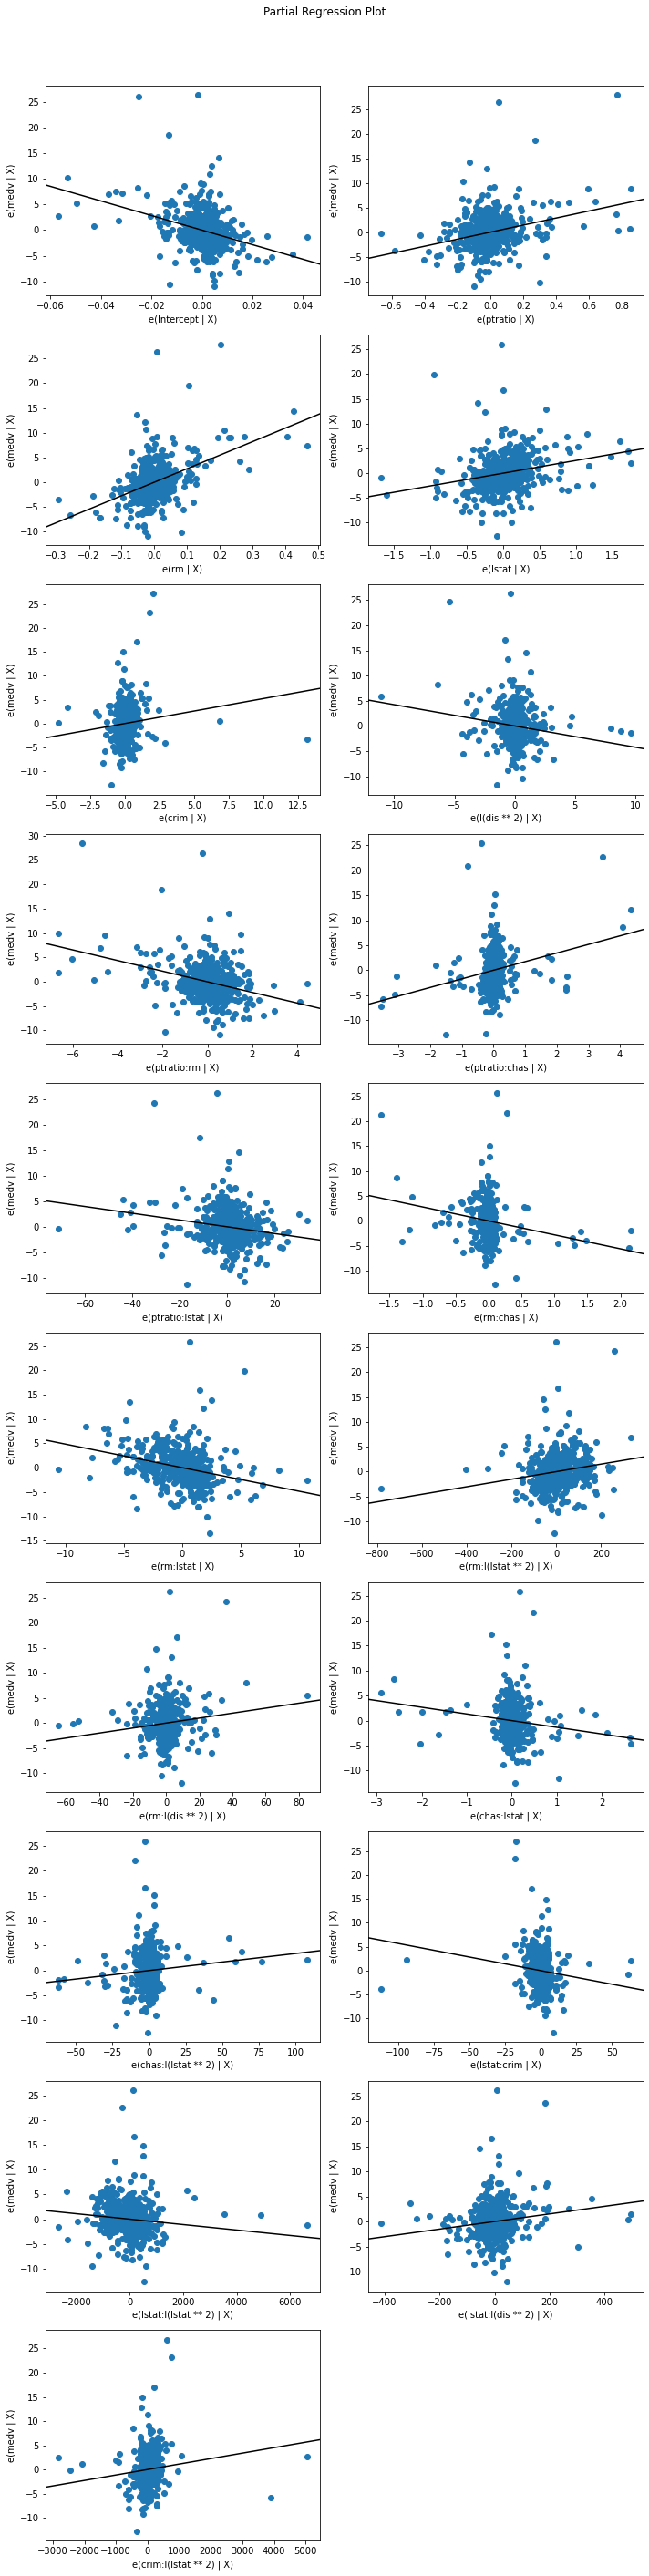

In [110]:
_ = plot_partregress_grid(lm, fig=plt.figure(figsize=(10, 40)))

eval_env: 1


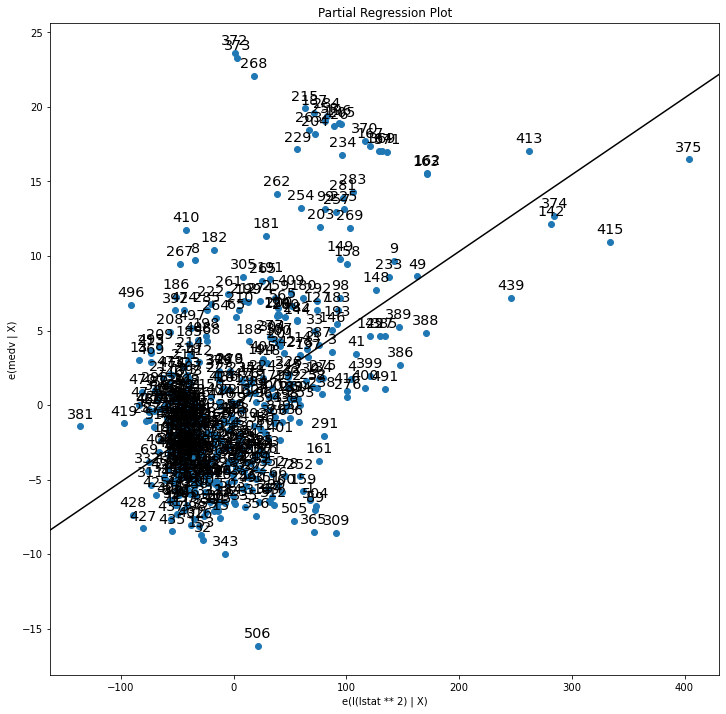

In [70]:
# x_var = 'lstat'
x_var = obj_Linear_Regr.xvar_names[2]
x_others = list(set(obj_Linear_Regr.xvar_names) - {'Intercept', x_var})
y_var = obj_Linear_Regr.yvar_name

fig = sm.graphics.plot_partregress(endog = y_var, exog_i = x_var, exog_others = x_others, 
                                   data=df_data, obs_labels=True)
fig.set_size_inches(12, 12)
# fig.tight_layout(pad=1.0)

In [45]:
# fig = plt.figure(figsize=(10, 10))
# _ = sm.graphics.plot_regress_exog(lm, "indus", fig=plt.figure(figsize=(10, 10)))

---

Predict functions

In [305]:
# Get in-sample predictions 
obj_Linear_Regr.predict_df().head(3)
m1.predict()[:3]

1    30.335350
2    26.515202
3    31.174183
dtype: float64

array([30.33534996, 26.51520217, 31.1741833 ])

In [306]:
# Get in-sample predictions + conf/prediction intervals
obj_Linear_Regr.predict_df(includeIntervals=True).head(3)
m1.get_prediction().summary_frame().head(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
1,30.335350,0.442001,29.466955,31.203745,18.175993,42.494707
2,26.515202,0.381643,25.765392,27.265012,14.363739,38.666666
3,31.174183,0.458910,30.272567,32.075800,19.012409,43.335958


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
1,30.335350,0.442001,29.466955,31.203745,18.175993,42.494707
2,26.515202,0.381643,25.765392,27.265012,14.363739,38.666666
3,31.174183,0.458910,30.272567,32.075800,19.012409,43.335958


In [307]:
# Get out of sample predictions
x_new1 = [5, 10, 15]
x_new2 = [68, 80, 10]
new_data = pd.DataFrame({'lstat':x_new1, 'age':x_new2})
m1.predict(x_for_m1)
obj_Linear_Regr.predict_df(new_data=new_data, includeIntervals=False).head(3)

0    30.411433
1    25.665622
2    18.087175
dtype: float64

0    30.411433
1    25.665622
2    18.087175
dtype: float64

In [308]:
# Get out of sample predictions + conf/prediction intervals
obj_Linear_Regr.predict_df(new_data=new_data, includeIntervals=True).head(3)
m1.get_prediction(new_data).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30.411433,0.456351,29.514843,31.308022,18.250030,42.572836
1,25.665622,0.364254,24.949975,26.381268,13.516219,37.815025
2,18.087175,0.835751,16.445183,19.729168,5.848222,30.326129


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,30.411433,0.456351,29.514843,31.308022,18.250030,42.572836
1,25.665622,0.364254,24.949975,26.381268,13.516219,37.815025
2,18.087175,0.835751,16.445183,19.729168,5.848222,30.326129


In [57]:
f = (df
     .pipe(graph.histo_many, 3, 50, 1600)) 
functions.save (f, d_paths, 'histo_many')

In [58]:
# df = data.make_categ (df, ['cards','education','own','student','married','region'])

In [20]:
# df.info()

In [22]:
# df.describe().round(2)

In [27]:
# px.scatter(df, x="lstat", y="medv", color="rad")

In [23]:
# (df
#  .pipe(functions.drop_categ_cols))

In [59]:
f =(df
 .pipe(functions.drop_categ_cols)
 .pipe (graph.pairplot, graph_size=2000))

functions.save (f, d_paths, 'pairplot')

In [28]:
# df_melt = pd.melt(df, id_vars=[y_col])

In [29]:
# f = px.scatter(df_melt, x="value", y=df_melt[y_col], facet_col="variable", facet_col_wrap=3)
# f.update_xaxes(matches=None)
# f.update_layout( width=1000,height=1000)